In [1]:
#import os
import keras

#本作業可以不需使用GPU, 將GPU設定為"無"(若有GPU且想開啟, 可設為 "0")
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
#從Keras的內建功能中, 取得train與test資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
#將X與Y獨立放進變數
x_train, y_train = train
x_test, y_test = test
#資料前處理-將圖片標準化
x_train = x_train / 255.
x_test = x_test / 255.

#將資料從圖形(RGB)轉為向量(Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

#將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

In [5]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 2s 12ms/step - loss: 2.2812 - accuracy: 0.1482 - val_loss: 2.2294 - val_accuracy: 0.1769
Epoch 2/100
196/196 [==============================] - 2s 9ms/step - loss: 2.1970 - accuracy: 0.2013 - val_loss: 2.1634 - val_accuracy: 0.2243
Epoch 3/100
196/196 [==============================] - 2s 9ms/step - loss: 2.1367 - accuracy: 0.2402 - val_loss: 2.1082 - val_accuracy: 0.2593
Epoch 4/100
196/196 [==============================] - 2s 11ms/step - loss: 2.0876 - accuracy: 0.2676 - val_loss: 2.0656 - val_accuracy: 0.2857
Epoch 5/100
196/196 [==============================] - 2s 11ms/step - loss: 2.0486 - accuracy: 0.2833 - val_loss: 2.0309 - val_accuracy: 0.2954
Epoch 6/100
196/196 [==============================] - 2s 11ms/step - loss: 2.0169 - accuracy: 0.2948 - val_loss: 2.0035 - val_accuracy: 0.3065
Epoch 7/100
196/196 [==============================] - 2s 11ms/step - loss: 1.9907 - accuracy: 0.3056 - val_loss: 1.9798 - val_accuracy: 0

196/196 [==============================] - 2s 10ms/step - loss: 1.6562 - accuracy: 0.4235 - val_loss: 1.6626 - val_accuracy: 0.4196
Epoch 58/100
196/196 [==============================] - 2s 10ms/step - loss: 1.6532 - accuracy: 0.4243 - val_loss: 1.6593 - val_accuracy: 0.4230
Epoch 59/100
196/196 [==============================] - 2s 10ms/step - loss: 1.6501 - accuracy: 0.4253 - val_loss: 1.6562 - val_accuracy: 0.4227
Epoch 60/100
196/196 [==============================] - 2s 10ms/step - loss: 1.6472 - accuracy: 0.4268 - val_loss: 1.6522 - val_accuracy: 0.4238
Epoch 61/100
196/196 [==============================] - 2s 11ms/step - loss: 1.6441 - accuracy: 0.4264 - val_loss: 1.6517 - val_accuracy: 0.4241
Epoch 62/100
196/196 [==============================] - 2s 11ms/step - loss: 1.6412 - accuracy: 0.4278 - val_loss: 1.6468 - val_accuracy: 0.4262
Epoch 63/100
196/196 [==============================] - 2s 11ms/step - loss: 1.6383 - accuracy: 0.4294 - val_loss: 1.6453 - val_accuracy: 0.427

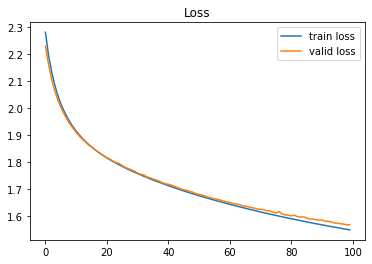

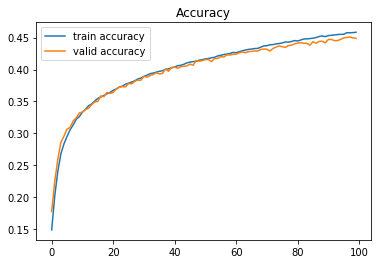

In [8]:
#以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()